In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Patient Treatment Classification**

* Model: Gradient Boosting
* Accuracy: 75%
* Details: The dataset consists of 10 features derived from blood test results. A Gradient Boosting model, which combines multiple weak learners, is used to predict whether a patient requires immediate care. The model achieves a moderate accuracy of 75%, indicating the potential for further optimization.

In [2]:
df = pd.read_csv('/kaggle/input/patient-treatment-classification/data-ori.csv')
print(df.shape)
df

(4412, 11)


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out
3,39.1,13.7,4.98,10.5,366,27.5,35.0,78.5,1,F,out
4,30.9,9.9,4.23,22.1,333,23.4,32.0,73.0,1,M,out
...,...,...,...,...,...,...,...,...,...,...,...
4407,32.8,10.4,3.49,8.1,72,29.8,31.7,94.0,92,F,in
4408,33.7,10.8,3.67,6.7,70,29.4,32.0,91.8,92,F,in
4409,33.2,11.2,3.47,7.2,235,32.3,33.7,95.7,93,F,out
4410,31.5,10.4,3.15,9.1,187,33.0,33.0,100.0,98,F,in


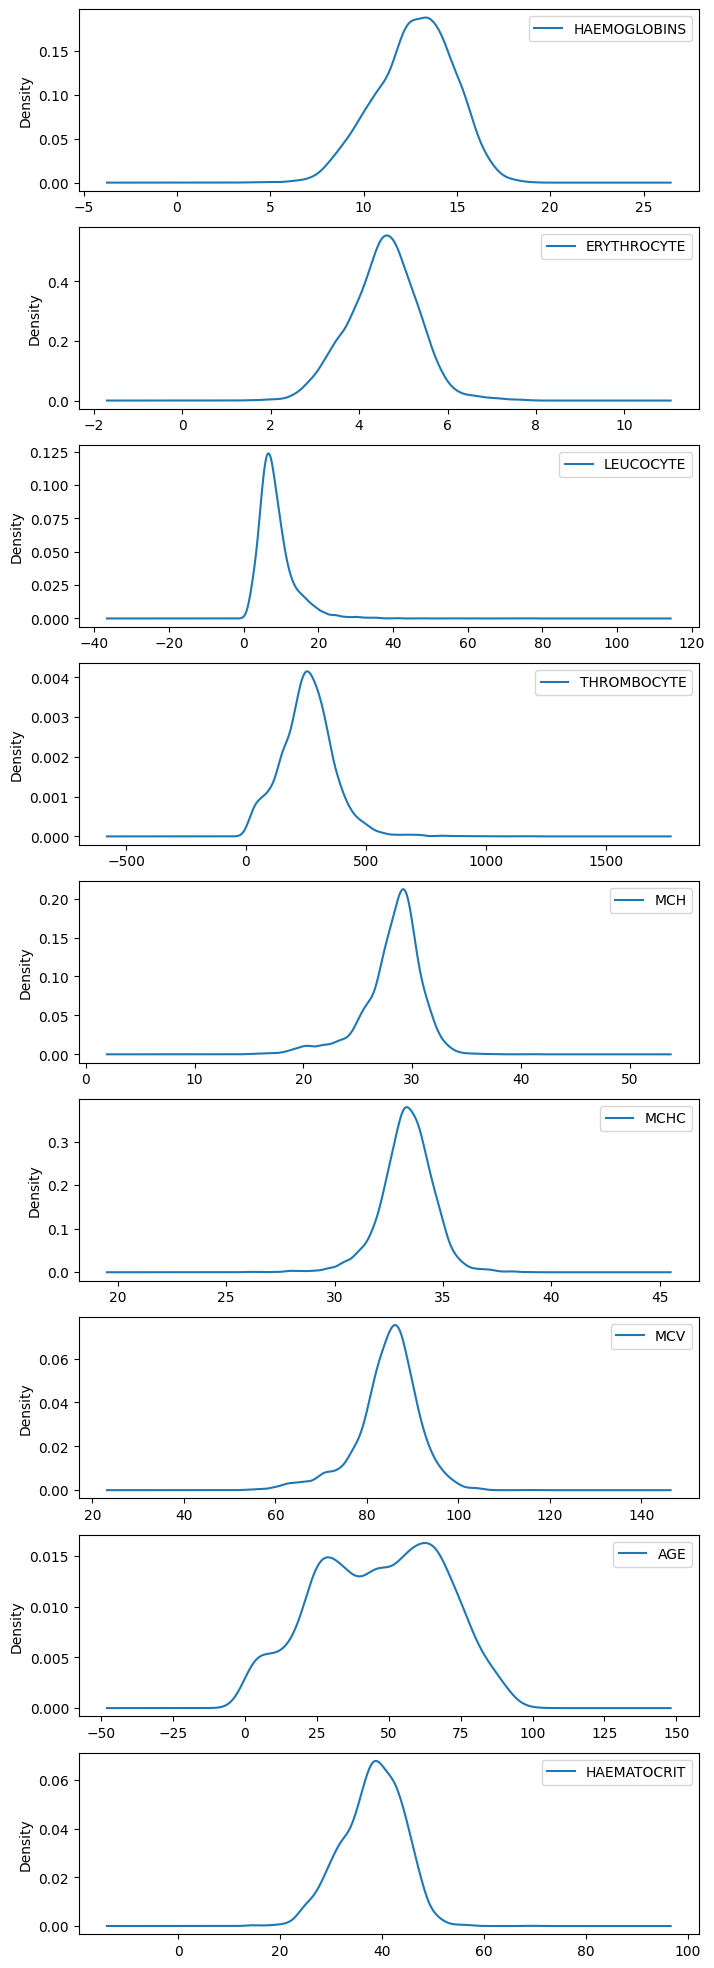

In [3]:
features = [feat for feat in df.columns if feat !='SOURCE']
num_features = [feat for feat in features if df[feat].dtype != object]
import matplotlib.pyplot as plt
fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = df[[c]].plot(kind='kde',ax=axes[i-1])

In [4]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [5]:
y = df['SOURCE']
X = df.drop(['SOURCE'],axis=1)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
from sklearn.metrics import accuracy_score,f1_score

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
pred = gb.predict(X_test)
acc = accuracy_score(y_test,pred)
f1 = f1_score(y_test,pred)
print('Gradient Boosting classifier accuracy : ',acc)
print('Gradient Boosting classifier F1 score : ',f1)

Gradient Boosting classifier accuracy :  0.7417893544733862
Gradient Boosting classifier F1 score :  0.7927272727272726


# **Patient Survival Prediction**

* Model: Logistic Regression
* Accuracy: 92%
* Details: This dataset includes 180 features covering various aspects of a patient's medical history and treatment. A Logistic Regression model, a binary classifier, is employed to predict patient mortality. The model achieves a high accuracy of 92%, reflecting its effectiveness in identifying critical cases that may lead to patient death.

In [8]:
df=pd.read_csv('../input/patient-survival-prediction-model/Dataset.csv/Dataset.csv')
print(df.shape)
df.drop(["encounter_id", "hospital_id", "icu_id", "patient_id"], axis=1, inplace=True)
df.columns

(91713, 186)


Index(['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity',
       'gender', 'height', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=182)

In [9]:
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
scaler = StandardScaler()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [11]:
y = df[['hospital_death']].astype(int)
X = df.drop(['hospital_death'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
logistic_model = LogisticRegression(max_iter=200)

logistic_model.fit(X_train, y_train.values.ravel())
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.9257
Confusion Matrix:
 [[16526   230]
 [ 1133   454]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
